# <p style="background-color:#003366; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Digital Marketing Campaign Conversion Prediction (Definitive Advanced Version)</p>

### **Author:** Sanyam Sanjay Sharma
### **Date:** 24th September 2025

## **1. Library Imports**

**Metadata Comment:** Like getting all our toys out of the box before we play. We're just gathering all the tools we'll need for our project.

In [1]:
# === Core Libraries for Data Handling and Analysis ===
import pandas as pd
import numpy as np
import time

# === Libraries for Data Visualization ===
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# === Libraries for Data Preprocessing and Feature Engineering ===
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, QuantileTransformer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTEENN # Using a more advanced sampler

# === Libraries for Model Selection, Tuning, and Evaluation ===
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.metrics import PrecisionRecallDisplay

# === Machine Learning Models (Full Suite for Comprehensive Comparison) ===
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# === Model Persistence ===
import joblib

# === Utility ===
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


## **2. Data Loading and Initial Cleaning**

**Metadata Comment:** We open our book of stories (the data) and tear out the pages that are blank or don't have any useful information.

In [2]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
useless_columns = ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool']
df.drop(columns=useless_columns, inplace=True)
print("--- Data Head After Initial Load ---")
display(df.head())

--- Data Head After Initial Load ---


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


## **3. Exploratory Data Analysis (EDA)**

**Metadata Comment:** Let's get to know our data, like meeting a new friend. We'll ask it questions to learn about its personality before we do anything else.

In [3]:
# Metadata Comment: We're asking our data for its ID card. It tells us what each column is called, how many entries are not empty, and what type of information is in them (like numbers or words).
print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 16  Conver

In [4]:
# Metadata Comment: We're checking if there are any empty spots or missing puzzle pieces in our data. It looks like it's all complete!
print("--- Null Value Check ---")
display(df.isnull().sum())

--- Null Value Check ---


Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

In [5]:
# Metadata Comment: For all the number-based clues, we're getting a quick summary, like the average number, the biggest number, and the smallest number. This helps us understand the range of our numbers.
print("--- Statistical Summary ---")
display(df.describe().T)

--- Statistical Summary ---


,count,mean,std,min,25%,50%,75%,max
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000
EmailOpens,8000.0,9.476875,5.711111,0.000000,5.000000,9.000000,14.000000,19.000000


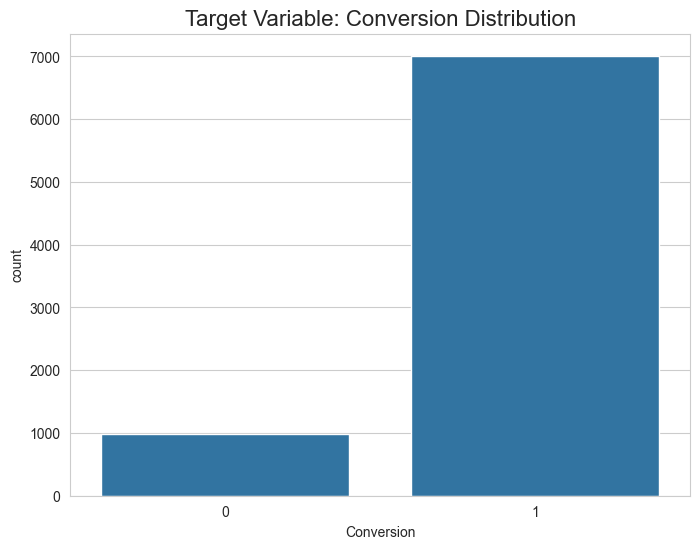

In [6]:
# Metadata Comment: We're counting how many 'yes' (1) and 'no' (0) answers we have. We see one group is much bigger than the other, which confirms we need our special resampling tools later.
plt.figure(figsize=(8, 6))
sns.countplot(x='Conversion', data=df)
plt.title('Target Variable: Conversion Distribution', fontsize=16)
plt.show()

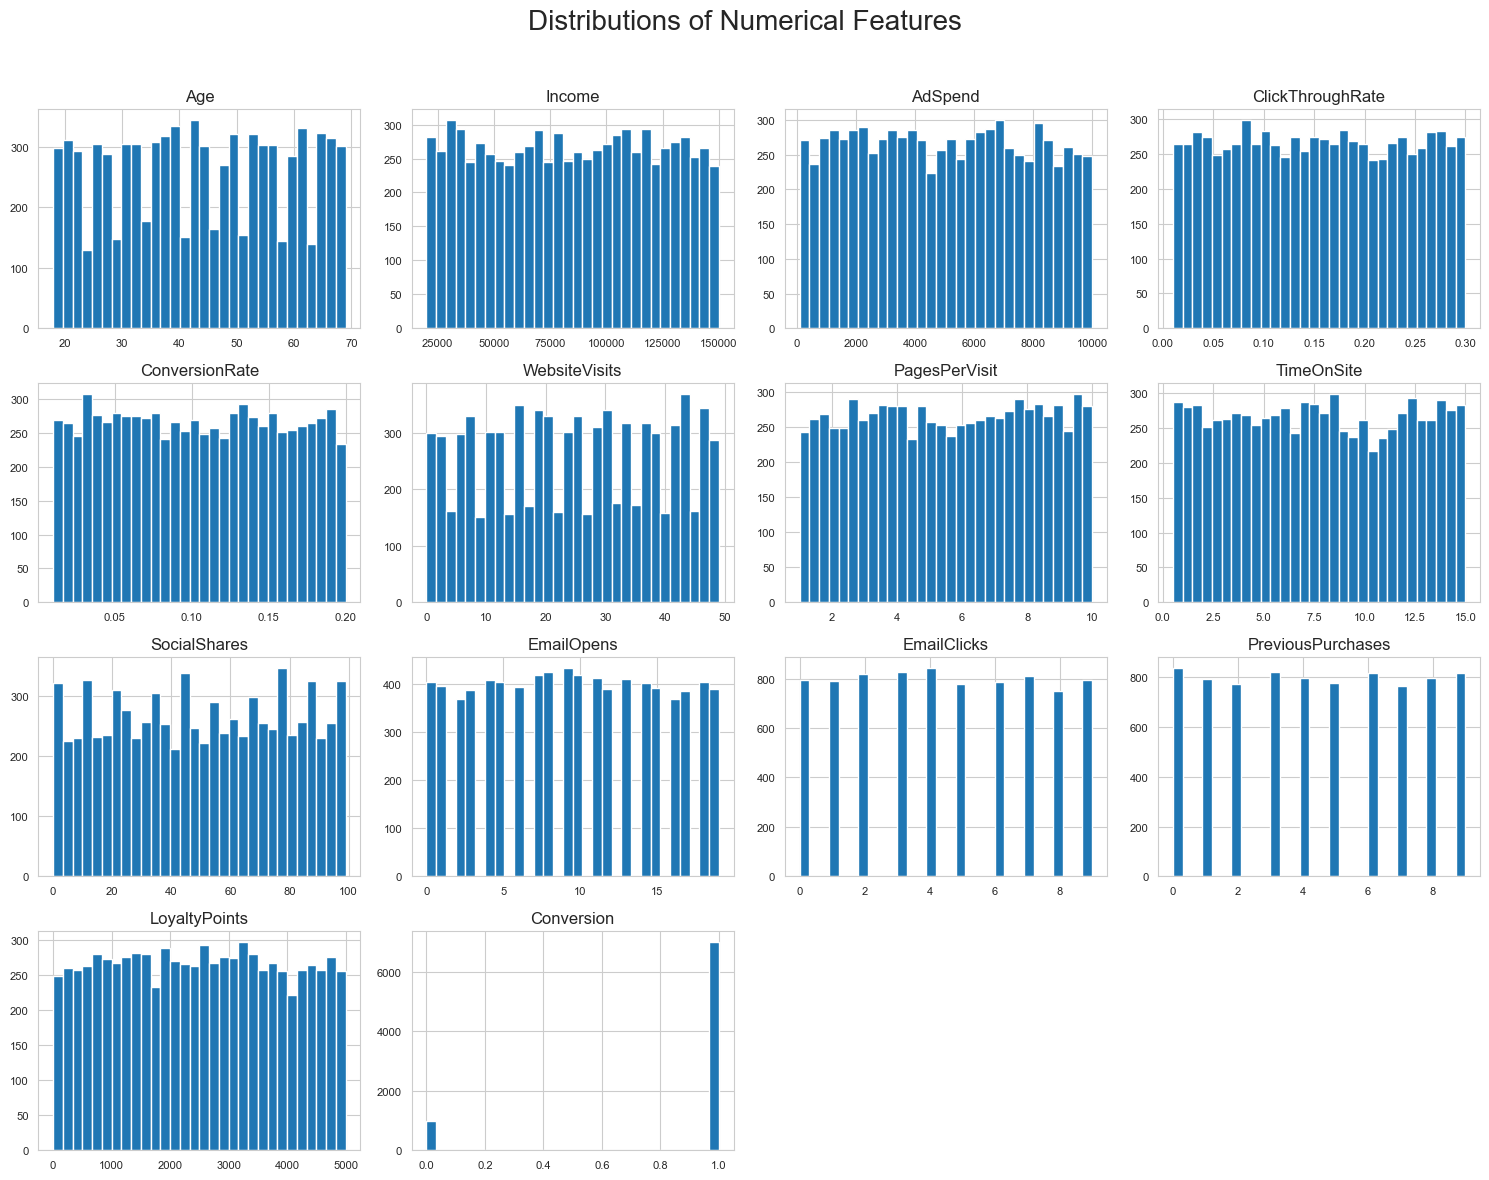

In [7]:
# Metadata Comment: We're looking at the shape of our number clues. Some are balanced like a seesaw (Age), and some are stretched out to one side (like AdSpend).
df.select_dtypes(include=np.number).hist(figsize=(15, 12), bins=30, xlabelsize=8, ylabelsize=8)
plt.suptitle('Distributions of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

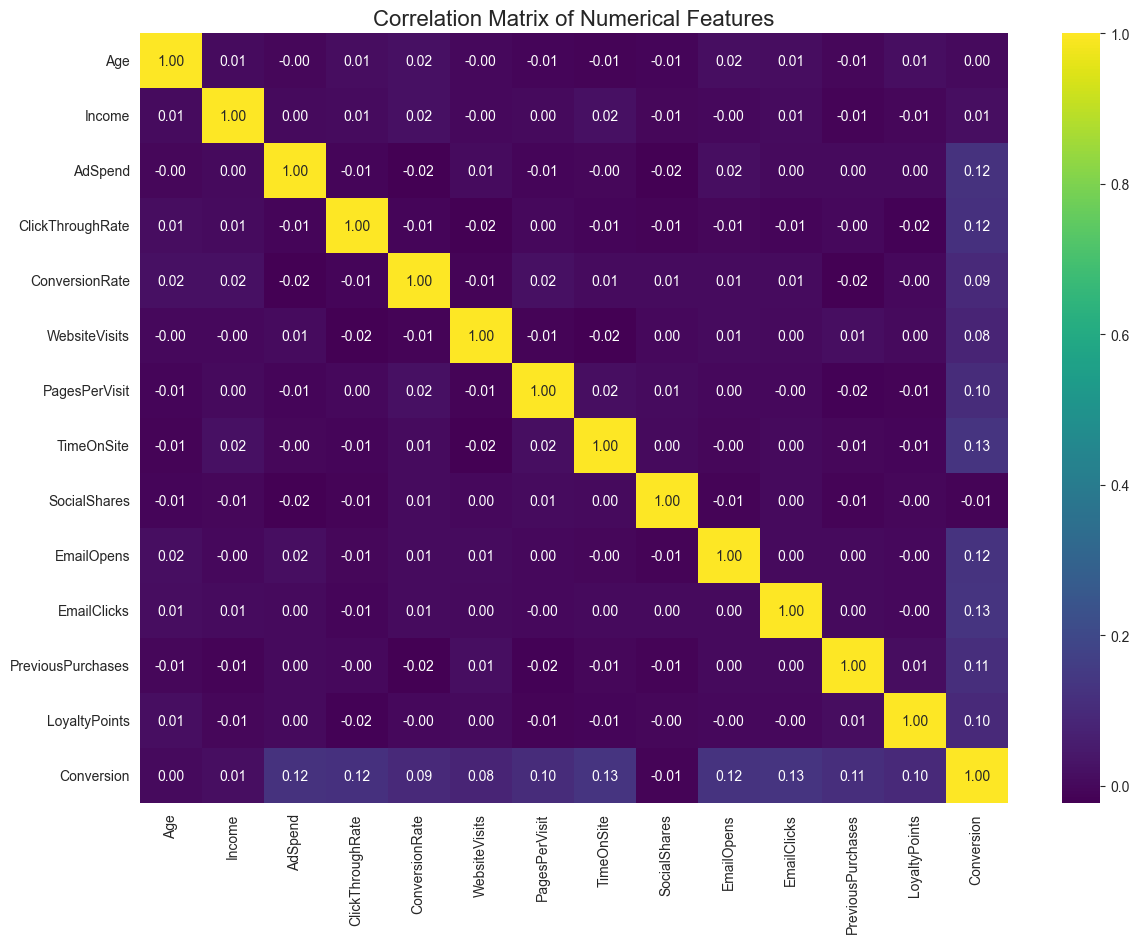

In [8]:
# Metadata Comment: We're checking to see if any of our number clues are telling us the same story. If two clues are almost identical, we might not need both. Bright colors show strong connections.
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## **4. Advanced Feature Engineering**

**Metadata Comment:** This is where we play detective! We take the clues we already have (our columns) and combine them to create brand new, super-clues that will make it much easier for our models to solve the puzzle.

In [9]:
# In-script Comment: Handle potential division by zero when creating new features.
df['WebsiteVisits_nozero'] = df['WebsiteVisits'].replace(0, 1) # Avoid dividing by zero, keep original for other models

# --- Interaction Terms ---
# Metadata Comment: We are teaching the computer new ideas. Like how much we paid for each visit (CostPerVisit) and how interested someone was (EngagementScore).
df['CostPerVisit'] = df['AdSpend'] / df['WebsiteVisits_nozero']
df['EngagementScore'] = df['TimeOnSite'] * df['PagesPerVisit']
df.drop('WebsiteVisits_nozero', axis=1, inplace=True)

# --- Binning Features ---
# Metadata Comment: Instead of exact ages, we put people into groups like 'Young', 'Adult', 'Senior'. It's easier for the computer to see patterns in groups.
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 50, 70], labels=['Young', 'Adult', 'Senior'])
df['IncomeTier'] = pd.cut(df['Income'], bins=[19999, 50000, 90000, 150000], labels=['Low', 'Medium', 'High'])

print("--- Data Head After Feature Engineering ---")
display(df.head())

--- Data Head After Feature Engineering ---


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,CostPerVisit,EngagementScore,AgeGroup,IncomeTier
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,...,19,6,9,4,688,1,6497.870068,17.745052,Senior,High
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,...,5,2,7,2,3459,1,92.825443,15.614122,Senior,Low
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,...,0,11,2,8,2337,1,773.214798,113.444015,Adult,Medium
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,...,89,2,2,0,2463,1,11.479275,66.698958,Adult,Low
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,...,6,6,6,8,4345,1,1678.043573,28.642290,Senior,Medium


## **5. Data Splitting**

**Metadata Comment:** We split our data into two piles. One pile to teach our models (training set) and another pile to give them a final test on things they've never seen before (test set).

In [10]:
# In-script Comment: Separate features (X) from the target variable (y)
X = df.drop('Conversion', axis=1)
y = df['Conversion']

# In-script Comment: Split the feature-engineered data. Resampling will be handled inside the pipeline.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("✅ Data Splitting Complete.")
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

✅ Data Splitting Complete.
Training Set Shape: (6400, 20)
Test Set Shape: (1600, 20)


## **6. Preprocessing Pipelines and Model Training**

**Metadata Comment:** We are building a recipe book (Pipelines) for our models. Each recipe tells the computer exactly how to prepare the data before trying to learn from it. This ensures we do the same steps every single time.

In [11]:
# In-script Comment: Redefine feature types after adding new engineered features.
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# In-script Comment: Main preprocessor with StandardScaler for most models.
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# In-script Comment: Preprocessor with QuantileTransformer for distance-based models like KNN.
preprocessor_quantile = ColumnTransformer(
    transformers=[
        ('num', QuantileTransformer(output_distribution='normal'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# In-script Comment: Preprocessor for Naive Bayes with feature discretization.
preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num_discretize', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['Income', 'AdSpend', 'TimeOnSite']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model_results = {}

### **6.1 Linear & SVM Models (with Polynomial Features)**
**Metadata Comment:** We're giving these models superhero powers! By adding polynomial features, we let them draw curvy lines instead of just straight ones, helping them solve harder puzzles.

In [12]:
# --- Logistic Regression ---
pipeline_lr = ImbPipeline([
    ('preprocessor', preprocessor_standard),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('sampler', SMOTEENN(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])
param_grid_lr = {
    'poly__degree': [2],
    'classifier__C': [1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("--- Logistic Regression ---")
print(f"Best Parameters: {grid_lr.best_params_}")
print(f"Best CV Accuracy: {grid_lr.best_score_:.4f}")
model_results['Logistic Regression'] = (grid_lr.best_score_, grid_lr.best_params_)

--- Logistic Regression ---
Best Parameters: {'classifier__C': 100, 'classifier__solver': 'liblinear', 'poly__degree': 2}
Best CV Accuracy: 0.6386


In [13]:
# --- Ridge Classifier ---
pipeline_ridge = ImbPipeline([
    ('preprocessor', preprocessor_standard),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('sampler', SMOTEENN(random_state=42)), 
    ('classifier', RidgeClassifier(random_state=42))
])
param_grid_ridge = {
    'poly__degree': [2],
    'classifier__alpha': [1.0, 10.0, 100.0]
}
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='accuracy', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print("--- Ridge Classifier ---")
print(f"Best Parameters: {grid_ridge.best_params_}")
print(f"Best CV Accuracy: {grid_ridge.best_score_:.4f}")
model_results['Ridge Classifier'] = (grid_ridge.best_score_, grid_ridge.best_params_)

--- Ridge Classifier ---
Best Parameters: {'classifier__alpha': 10.0, 'poly__degree': 2}
Best CV Accuracy: 0.5845


In [14]:
# --- SGD Classifier (Lasso) ---
pipeline_sgd = ImbPipeline([
    ('preprocessor', preprocessor_standard),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('sampler', SMOTEENN(random_state=42)),
    ('classifier', SGDClassifier(penalty='l1', loss='log_loss', random_state=42))
])
param_grid_sgd = {
    'poly__degree': [2],
    'classifier__alpha': [0.001, 0.01, 0.1]
}
grid_sgd = GridSearchCV(pipeline_sgd, param_grid_sgd, cv=5, scoring='accuracy', n_jobs=-1)
grid_sgd.fit(X_train, y_train)
print("--- SGD Classifier (Lasso) ---")
print(f"Best Parameters: {grid_sgd.best_params_}")
print(f"Best CV Accuracy: {grid_sgd.best_score_:.4f}")
model_results['SGD Classifier (Lasso)'] = (grid_sgd.best_score_, grid_sgd.best_params_)

--- SGD Classifier (Lasso) ---
Best Parameters: {'classifier__alpha': 0.001, 'poly__degree': 2}
Best CV Accuracy: 0.6283


In [15]:
# --- Support Vector Machine (SVM) ---
pipeline_svc = ImbPipeline([
    ('preprocessor', preprocessor_standard),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('sampler', SMOTEENN(random_state=42)),
    ('classifier', SVC(random_state=42, probability=True))
])
param_grid_svc = {
    'poly__degree': [2],
    'classifier__C': [10, 50],
    'classifier__kernel': ['rbf', 'poly']
}
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)
print("--- Support Vector Machine ---")
print(f"Best Parameters: {grid_svc.best_params_}")
print(f"Best CV Accuracy: {grid_svc.best_score_:.4f}")
model_results['Support Vector Machine'] = (grid_svc.best_score_, grid_svc.best_params_)

--- Support Vector Machine ---
Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf', 'poly__degree': 2}
Best CV Accuracy: 0.7942


### **6.2 Tree-Based Ensembles**
**Metadata Comment:** These models are like teams of little detectives (decision trees). We're testing different ways of organizing these teams to see which one is the best.

In [16]:
# --- Decision Tree ---
pipeline_dt = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', DecisionTreeClassifier(random_state=42))])
param_grid_dt = {'classifier__max_depth': [10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]}
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print("--- Decision Tree ---")
print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Best CV Accuracy: {grid_dt.best_score_:.4f}")
model_results['Decision Tree'] = (grid_dt.best_score_, grid_dt.best_params_)

--- Decision Tree ---
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV Accuracy: 0.7078


In [17]:
# --- Bagging Classifier ---
pipeline_bag = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', BaggingClassifier(random_state=42, n_jobs=-1))])
param_grid_bag = {'classifier__n_estimators': [50, 100, 200]}
grid_bag = GridSearchCV(pipeline_bag, param_grid_bag, cv=5, scoring='accuracy', n_jobs=-1)
grid_bag.fit(X_train, y_train)
print("--- Bagging Classifier ---")
print(f"Best Parameters: {grid_bag.best_params_}")
print(f"Best CV Accuracy: {grid_bag.best_score_:.4f}")
model_results['Bagging Classifier'] = (grid_bag.best_score_, grid_bag.best_params_)

--- Bagging Classifier ---
Best Parameters: {'classifier__n_estimators': 200}
Best CV Accuracy: 0.7889


In [18]:
# --- Random Forest Classifier ---
pipeline_rf = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))])
param_grid_rf = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [30, None],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_impurity_decrease': [0.0, 0.01]
}
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("--- Random Forest ---")
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best CV Accuracy: {grid_rf.best_score_:.4f}")
model_results['Random Forest'] = (grid_rf.best_score_, grid_rf.best_params_)

--- Random Forest ---
Best Parameters: {'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
Best CV Accuracy: 0.8347


In [19]:
# --- Extra Trees Classifier ---
pipeline_et = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', ExtraTreesClassifier(random_state=42, n_jobs=-1))])
param_grid_et = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [30, None],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_impurity_decrease': [0.0, 0.01]
}
grid_et = GridSearchCV(pipeline_et, param_grid_et, cv=5, scoring='accuracy', n_jobs=-1)
grid_et.fit(X_train, y_train)
print("--- Extra Trees ---")
print(f"Best Parameters: {grid_et.best_params_}")
print(f"Best CV Accuracy: {grid_et.best_score_:.4f}")
model_results['Extra Trees'] = (grid_et.best_score_, grid_et.best_params_)

--- Extra Trees ---
Best Parameters: {'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_impurity_decrease': 0.0, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
Best CV Accuracy: 0.8566


### **6.3 Advanced Boosting Models**
**Metadata Comment:** These are our superstar models. We're tuning them very carefully, adding rules (regularization) to make sure they don't get *too* smart and start memorizing the answers instead of learning the real patterns.

In [20]:
# --- AdaBoost Classifier ---
pipeline_ada = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', AdaBoostClassifier(random_state=42))])
param_grid_ada = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0]
}
grid_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_ada.fit(X_train, y_train)
print("--- AdaBoost ---")
print(f"Best Parameters: {grid_ada.best_params_}")
print(f"Best CV Accuracy: {grid_ada.best_score_:.4f}")
model_results['AdaBoost'] = (grid_ada.best_score_, grid_ada.best_params_)

--- AdaBoost ---
Best Parameters: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 200}
Best CV Accuracy: 0.7781


In [21]:
# --- Gradient Boosting Machine (GBM) ---
pipeline_gbm = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', GradientBoostingClassifier(random_state=42))])
param_grid_gbm = {
    'classifier__n_estimators': [200, 300],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [5, 7],
    'classifier__subsample': [0.8, 1.0]
}
grid_gbm = GridSearchCV(pipeline_gbm, param_grid_gbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_gbm.fit(X_train, y_train)
print("--- Gradient Boosting ---")
print(f"Best Parameters: {grid_gbm.best_params_}")
print(f"Best CV Accuracy: {grid_gbm.best_score_:.4f}")
model_results['Gradient Boosting'] = (grid_gbm.best_score_, grid_gbm.best_params_)

--- Gradient Boosting ---
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 1.0}
Best CV Accuracy: 0.8591


In [22]:
# --- XGBoost Classifier ---
pipeline_xgb = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])
param_grid_xgb = {
    'classifier__n_estimators': [200, 400],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1],
    'classifier__reg_lambda': [1, 1.5]
}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("--- XGBoost ---")
print(f"Best Parameters: {grid_xgb.best_params_}")
print(f"Best CV Accuracy: {grid_xgb.best_score_:.4f}")
model_results['XGBoost'] = (grid_xgb.best_score_, grid_xgb.best_params_)

--- XGBoost ---
Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__n_estimators': 400, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 1.5, 'classifier__subsample': 1.0}
Best CV Accuracy: 0.8669


In [23]:
# --- LightGBM Classifier ---
pipeline_lgbm = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', LGBMClassifier(random_state=42, n_jobs=-1))])
param_grid_lgbm = {
    'classifier__n_estimators': [200, 400],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [31, 40],
    'classifier__reg_alpha': [0, 0.1],
    'classifier__reg_lambda': [1, 1.5]
}
grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)
print("--- LightGBM ---")
print(f"Best Parameters: {grid_lgbm.best_params_}")
print(f"Best CV Accuracy: {grid_lgbm.best_score_:.4f}")
model_results['LightGBM'] = (grid_lgbm.best_score_, grid_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 2988, number of negative: 5590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 8578, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348333 -> initscore=-0.626375
[LightGBM] [Info] Start training from score -0.626375
--- LightGBM ---
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 400, 'classifier__num_leaves': 40, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1}
Best CV Accuracy: 0.8634


In [24]:
# --- CatBoost Classifier ---
pipeline_cat = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', CatBoostClassifier(random_state=42, verbose=0))])
param_grid_cat = {
    'classifier__iterations': [300, 500],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__depth': [6, 8]
}
grid_cat = GridSearchCV(pipeline_cat, param_grid_cat, cv=5, scoring='accuracy', n_jobs=-1)
grid_cat.fit(X_train, y_train)
print("--- CatBoost ---")
print(f"Best Parameters: {grid_cat.best_params_}")
print(f"Best CV Accuracy: {grid_cat.best_score_:.4f}")
model_results['CatBoost'] = (grid_cat.best_score_, grid_cat.best_params_)

--- CatBoost ---
Best Parameters: {'classifier__depth': 8, 'classifier__iterations': 500, 'classifier__learning_rate': 0.05}
Best CV Accuracy: 0.8628


### **6.4 Other Model Architectures**

In [25]:
# --- K-Nearest Neighbors (with QuantileTransformer) ---
# Metadata Comment: For this model, which works by measuring distance, we're using a special tool (QuantileTransformer) to make sure all the clues are measured on a fair and balanced scale.
pipeline_knn = ImbPipeline([('preprocessor', preprocessor_quantile), ('sampler', SMOTEENN(random_state=42)), ('classifier', KNeighborsClassifier(n_jobs=-1))])
param_grid_knn = {
    'classifier__n_neighbors': [5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("--- K-Nearest Neighbors ---")
print(f"Best Parameters: {grid_knn.best_params_}")
print(f"Best CV Accuracy: {grid_knn.best_score_:.4f}")
model_results['K-Nearest Neighbors'] = (grid_knn.best_score_, grid_knn.best_params_)

--- K-Nearest Neighbors ---
Best Parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best CV Accuracy: 0.4964


In [26]:
# --- Gaussian Naive Bayes (with Discretizer) ---
# Metadata Comment: This model likes things in simple boxes. We're taking our number clues and putting them into boxes (Discretizer) to make it easier for this model to understand.
pipeline_gnb = ImbPipeline([('preprocessor', preprocessor_nb), ('sampler', SMOTEENN(random_state=42)), ('classifier', GaussianNB())])
param_grid_gnb = {
    'preprocessor__num_discretize__n_bins': [5, 10, 15]
}
grid_gnb = GridSearchCV(pipeline_gnb, param_grid_gnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gnb.fit(X_train, y_train)
print("--- Gaussian Naive Bayes ---")
print(f"Best Parameters: {grid_gnb.best_params_}")
print(f"Best CV Accuracy: {grid_gnb.best_score_:.4f}")
model_results['Gaussian Naive Bayes'] = (grid_gnb.best_score_, grid_gnb.best_params_)

--- Gaussian Naive Bayes ---
Best Parameters: {'preprocessor__num_discretize__n_bins': 5}
Best CV Accuracy: 0.6498


In [27]:
# --- Multi-layer Perceptron ---
# Metadata Comment: This is our little robot brain! We're testing different brain sizes (hidden_layer_sizes) to see which one is the smartest at solving the puzzle.
pipeline_mlp = ImbPipeline([('preprocessor', preprocessor_standard), ('sampler', SMOTEENN(random_state=42)), ('classifier', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))])
param_grid_mlp = {
    'classifier__hidden_layer_sizes': [(50, 25), (100, 50), (100, 50, 25)],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate_init': [0.001, 0.01]
}
grid_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
print("--- Multi-layer Perceptron ---")
print(f"Best Parameters: {grid_mlp.best_params_}")
print(f"Best CV Accuracy: {grid_mlp.best_score_:.4f}")
model_results['MLP'] = (grid_mlp.best_score_, grid_mlp.best_params_)

--- Multi-layer Perceptron ---
Best Parameters: {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100, 50), 'classifier__learning_rate_init': 0.01}
Best CV Accuracy: 0.7759


## **7. Model Comparison**

**Metadata Comment:** Time for the awards ceremony! We line up all our models and see which ones were the best puzzle-solvers based on their test scores.

In [28]:
results_data = []
for model, (acc, params) in model_results.items():
    results_data.append({'Model': model, 'CV_Accuracy': acc, 'Best_Parameters': params})

results_df = pd.DataFrame(results_data)
results_df_sorted = results_df.sort_values('CV_Accuracy', ascending=False).reset_index(drop=True)

print("--- Model Comparison (Sorted by Accuracy) ---")
display(results_df_sorted)

--- Model Comparison (Sorted by Accuracy) ---


,Model,CV_Accuracy,Best_Parameters
0,XGBoost,0.866875,"{'classifier__colsample_bytree': 0.8, 'classif..."
1,LightGBM,0.863438,"{'classifier__learning_rate': 0.1, 'classifier..."
2,CatBoost,0.862813,"{'classifier__depth': 8, 'classifier__iteratio..."
3,Gradient Boosting,0.859063,"{'classifier__learning_rate': 0.1, 'classifier..."
4,Extra Trees,0.856563,"{'classifier__max_depth': 30, 'classifier__max..."
5,Random Forest,0.834687,"{'classifier__max_depth': 30, 'classifier__max..."
6,Support Vector Machine,0.794219,"{'classifier__C': 10, 'classifier__kernel': 'r..."
7,Bagging Classifier,0.788906,{'classifier__n_estimators': 200}
8,AdaBoost,0.778125,"{'classifier__learning_rate': 1.0, 'classifier..."
9,MLP,0.775938,"{'classifier__alpha': 0.001, 'classifier__hidd..."


## **8. Final Model Training: The Dream Team**

**Metadata Comment:** We're not picking just one winner. We're taking the top 3 smartest models and making them work together as a superhero team (an Ensemble). Their combined brainpower will be even greater!

In [29]:
# In-script Comment: Select the top 3 models from the results
top_models = results_df_sorted.nlargest(3, 'CV_Accuracy')
print("--- Top 3 Models for Ensemble ---")
display(top_models)

# In-script Comment: Define the model map for easy instantiation
model_map = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'SVC': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'MLP': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True)
}

# In-script Comment: Create a list of configured model instances for the Voting Classifier
estimators = []
for index, row in top_models.iterrows():
    model_name = row['Model']
    model_params = {key.split('__')[-1]: value for key, value in row['Best_Parameters'].items() if 'classifier__' in key}
    
    if model_name in model_map:
        instance = model_map[model_name]
        instance.set_params(**model_params)
        
        # In-script Comment: The final pipeline only needs standard preprocessing, as the model is trained on the full dataset.
        final_preprocessor = preprocessor_standard

        pipe = Pipeline([
            ('preprocessor', final_preprocessor),
            ('classifier', instance)
        ])
        estimators.append((model_name.lower().replace(' ', '_'), pipe))

# In-script Comment: Create the Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

print("\n--- Training Final Ensemble ---")
voting_clf.fit(X_train, y_train)

print("\n✅ Final Ensemble Model has been trained.")

--- Top 3 Models for Ensemble ---


,Model,CV_Accuracy,Best_Parameters
0,XGBoost,0.866875,"{'classifier__colsample_bytree': 0.8, 'classif..."
1,LightGBM,0.863438,"{'classifier__learning_rate': 0.1, 'classifier..."
2,CatBoost,0.862813,"{'classifier__depth': 8, 'classifier__iteratio..."



--- Training Final Ensemble ---

✅ Final Ensemble Model has been trained.


## **9. Feature Importance Analysis**

**Metadata Comment:** After the big contest, we ask the winning models, 'Which clues were the most helpful?' This helps us understand what's really important for predicting a conversion.

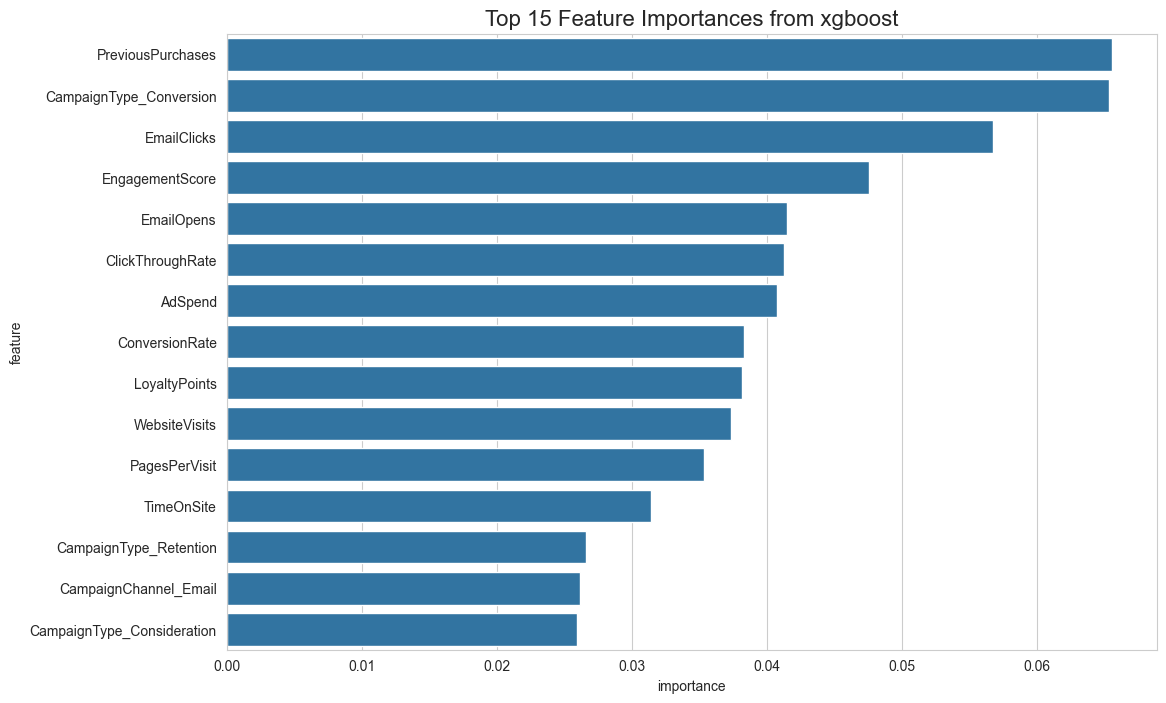

In [30]:
# In-script Comment: Extract feature names after one-hot encoding.
try:
    # Get the fitted preprocessor from the first estimator in the final ensemble
    fitted_preprocessor = voting_clf.named_estimators_[estimators[0][0]].named_steps['preprocessor']
    
    # Extract feature names from the ColumnTransformer
    encoded_cat_features = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([numerical_features, encoded_cat_features])
    
    # In-script Comment: Get feature importances from the first model in the ensemble (often a good proxy)
    first_estimator_name = estimators[0][0]
    first_estimator_model = voting_clf.named_estimators_[first_estimator_name].named_steps['classifier']
    
    if hasattr(first_estimator_model, 'feature_importances_'):
        importances = first_estimator_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=feature_importance_df)
        plt.title(f'Top 15 Feature Importances from {estimators[0][0]}', fontsize=16)
        plt.show()
    else:
        print(f"The first model ({first_estimator_name}) does not support feature_importances_.")
except Exception as e:
    print(f"Could not plot feature importances due to an error: {e}")

## **10. Save the Final Model**

**Metadata Comment:** We take a picture of our super-smart model team so we can use them again later without having to retrain them.

In [31]:
model_filename = 'final_ensemble_model_v8_definitive.pkl'
joblib.dump(voting_clf, model_filename)

print(f"💾 Final model saved to '{model_filename}'")

💾 Final model saved to 'final_ensemble_model_v8_definitive.pkl'


## **11. Final Model Evaluation on Unseen Test Data**

**Metadata Comment:** The final exam! We give our model team the test pile of data they've never seen before to get a true and honest grade on how smart they are.

--- Final Performance of Advanced Ensemble Model on Unseen Test Data ---
Test Accuracy: 0.9187
              precision    recall  f1-score   support

           0     0.8778    0.3990    0.5486       198
           1     0.9212    0.9922    0.9554      1402

    accuracy                         0.9187      1600
   macro avg     0.8995    0.6956    0.7520      1600
weighted avg     0.9158    0.9187    0.9050      1600



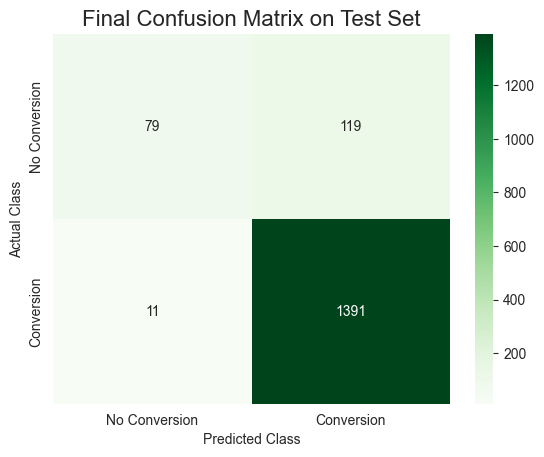

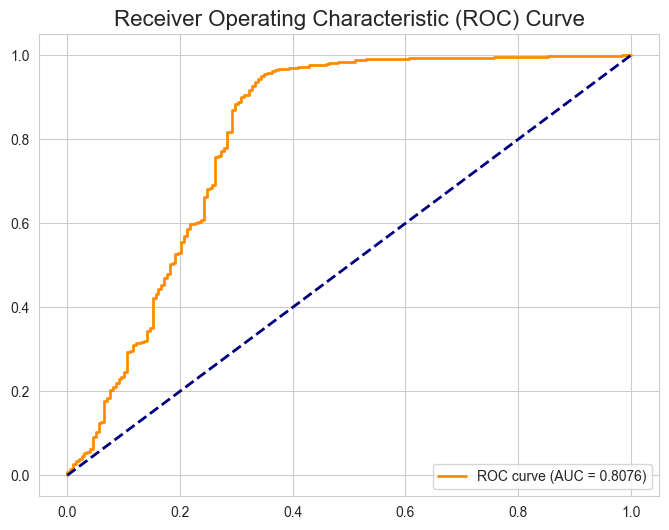

In [32]:
loaded_model = joblib.load(model_filename)
y_pred_test = loaded_model.predict(X_test)
y_proba_test = loaded_model.predict_proba(X_test)[:, 1]

print("--- Final Performance of Advanced Ensemble Model on Unseen Test Data ---")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print(classification_report(y_test, y_pred_test, digits=4))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title('Final Confusion Matrix on Test Set', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_test)
auc_score = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

## **12. Prediction Threshold Tuning**

**Metadata Comment:** The model guesses 'yes' if it's more than 50% sure. But maybe we want it to be more careful, or less careful. We'll look at all the possible 'sureness' levels to find the perfect one that gives us the best balance of finding all the real 'yes' answers without accidentally grabbing too many 'no' answers.

Best Threshold: 0.6814
Best F1 Score at this threshold: 0.9593

--- Classification Report with Optimal Threshold ---
              precision    recall  f1-score   support

           0     0.8240    0.5202    0.6378       198
           1     0.9356    0.9843    0.9593      1402

    accuracy                         0.9269      1600
   macro avg     0.8798    0.7523    0.7986      1600
weighted avg     0.9218    0.9269    0.9195      1600



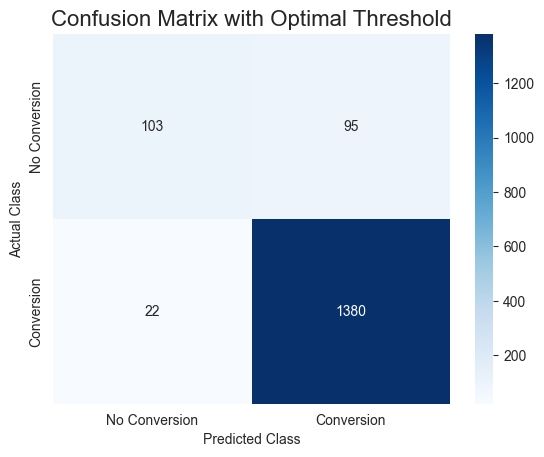

In [33]:
# In-script Comment: Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)

# In-script Comment: Calculate F1 score for each threshold
f1_scores = (2 * precision * recall) / (precision + recall)
f1_scores = np.nan_to_num(f1_scores) # Handle the case where precision and recall are both zero

# In-script Comment: Find the threshold that gives the best F1 score
best_f1_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_idx]
best_f1_score = f1_scores[best_f1_idx]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1 Score at this threshold: {best_f1_score:.4f}")

# In-script Comment: Get new predictions based on this optimal threshold
y_pred_new_threshold = (y_proba_test >= best_threshold).astype(int)

print("\n--- Classification Report with Optimal Threshold ---")
print(classification_report(y_test, y_pred_new_threshold, digits=4))

# In-script Comment: Visualize the new confusion matrix
cm_new = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title('Confusion Matrix with Optimal Threshold', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

<div style="background-color: #e6f7ff; border-left: 6px solid #1890ff; padding: 15px; font-size: 120%; text-align: center;">
<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href=\"https://github.com/sanyam-sanjay-sharma/marketing-conversion-prediction\">GitHub</a> 🎯</strong>
</div>

<h2 align="left"><font color='green'>Best Regards!</font></h2>